# 4 Training and Modeling Data<a id='4_Training_and_Modeling_Data'></a>

## Contents <a id ="Content" > </a>

* [Introduction](#Introduction)
* [Imports](#Imports)
* [Train Test Split](#Train_Test_Split) 
* [Training and Modeling](#Training_and_Modeling)
    * [Model Selection](#Model_Selection)
    * [Evaluation Metrics](#Evaluation-Metrics)
        * [Training and Modeling](#Train_and_Model)
        * [Hyperparameter Tuning and Model Training](#Hyperparameter_Tuning_Training)
            * [Logistic Regression](#Logistic_Regression)
            * [Evaluation](#Evaluation)
* [Additional Models](#AdditionalModels)
* [Summary](#Summary)
* [Recommendations](#Recom)

## Imports <a id="Imports"></a>

In [15]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import pipeline
from sklearn import model_selection
from sklearn import linear_model

#from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# remove warning
#import warnings
#warnings.filterwarnings("ignore")


In [16]:
#evaluation = pd.DataFrame(index=[],columns =[])
#metrics_comparison = pd.DataFrame(index=[],columns =[])

#### Data Reading

In [17]:
#Read the data
X_train = pd.read_csv("../data/4.X_train.csv")
y_train = pd.read_csv("../data/4.y_train.csv")
X_test = pd.read_csv("../data/4.X_test.csv")
y_test = pd.read_csv("../data/4.y_test.csv")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
X_train.shape,y_train.shape

((7088, 16), (7088,))

In [19]:
X_test.shape,y_test.shape

((3039, 16), (3039,))

In [20]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7088.0,-3.448458e-16,1.000071,-2.531322,-0.661337,-0.038008,0.709986,3.327966
Credit_Limit,7088.0,8.597793e+00,0.930669,7.271217,7.841395,8.418587,9.298671,10.449178
Total_Revolving_Bal,7088.0,9.103482e-01,0.638103,0.000000,0.248822,1.000000,1.396112,1.977219
Total_Trans_Amt,7088.0,8.167921e+00,0.656979,6.390241,7.674617,8.267449,8.468633,9.824661
Avg_Utilization_Ratio,7088.0,2.753070e-01,0.276635,0.000000,0.023000,0.175000,0.502000,0.999000
Gender_Encoded,7088.0,5.328725e-01,0.498953,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,7088.0,2.344949e+00,1.299597,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,7088.0,2.839306e+00,1.215114,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,7088.0,2.175226e+00,1.334986,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,7088.0,1.081546e+00,0.330233,1.000000,1.000000,1.000000,1.000000,4.000000


In [21]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,3039.0,2.431604e-16,1.000165,-2.545475,-0.671517,-0.046864,0.702719,2.701607
Credit_Limit,3039.0,8.616519e+00,0.940983,7.271217,7.854381,8.432724,9.328701,10.449178
Total_Revolving_Bal,3039.0,9.134881e-01,0.640117,0.000000,0.349961,1.000000,1.401403,1.961808
Total_Trans_Amt,3039.0,8.157574e+00,0.648578,6.234411,7.682021,8.271293,8.453401,9.797849
Avg_Utilization_Ratio,3039.0,2.739293e-01,0.273522,0.000000,0.022500,0.177000,0.503500,0.994000
Gender_Encoded,3039.0,5.202369e-01,0.499673,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,3039.0,2.349128e+00,1.297511,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,3039.0,2.851925e+00,1.201185,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,3039.0,2.199079e+00,1.332057,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,3039.0,1.088516e+00,0.341929,1.000000,1.000000,1.000000,1.000000,4.000000


#### **Scaling**
**MinMax Scaling**:  The Min-Max Scaler is a data normalization technique used to transform features so that they fit within a specific range, usually [0, 1]. This helps machine learning models train more effectively and obtain more generalized values for coefficients and intercepts.
Equation :  Xsc=X−Xmin/Xmax−Xmin where x is the datapoint. mi nand max are respective minimum and maximum values of corresponding datapoint

Since the outliers are capped, minmax scaling would be good form of scaling data,as nothing to cap by min max scalar.

In [22]:
# Apply MinMaxScaler to train and test data
from sklearn.preprocessing import MinMaxScaler

# Apply StandardScaler on train data (fit and transform)
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False) # range is 0 to 1.
X_train = scaler.fit_transform(X_train)

# Apply the scaler on test data (transform only)
X_test = scaler.transform(X_test)

Let's start off with the simplest model - Logistic Regression

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve,precision_recall_curve,classification_report,confusion_matrix

In [24]:
# Calculate scores and report matrics
# create list to store scores to display in tabular form and is used at the end of the model
precision_recall_test = []
precision_recall_train = []

def Calculate_scores(model_name,y_test_df,y_pred_df,test = True):

    # Calculate Precision, Recall, and F1 Score, average=none is used to get both class scores
    precision = precision_score(y_test_df, y_pred_df,average=None)
    recall = recall_score(y_test_df, y_pred_df,average=None)
    f1 = f1_score(y_test_df, y_pred_df,average=None)
    #accuracy = accuracy_score(y_test,y_pred)

    # storing precision, reall, f1 score into list
    if test:
        precision_recall_test.append({
        'Model': model_name,
        'Precision_test': precision.round(2),
        'Recall_test': recall.round(2),
        'f1_test': f1.round(2)
        #'Accuracy': accuracy
        })
    else:
        precision_recall_train.append({
        'Model': model_name,
        'Precision_train': precision.round(2),
        'Recall_train': recall.round(2),
        'f1_train': f1.round(2)
        #'Accuracy': accuracy
        })


    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = roc_auc_score(y_test_df, y_pred_df)

    # Get confusion matrix and classification  report
    #conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test_df,y_pred_df)

    #print(f"\nConfusion matrix\n {conf_matrix}")
    print(f"\nClassification Report\n {class_report}")

In [25]:
# Confusion Matrix,Precision-Recall Curve, ROC Curve
def Plot_Reports(estimator,X_test_df,y_test_df,y_pred_df):
    y_pred_df = y_pred_df.astype(int)  # Ensure y_pred is integers

    # Convert y_test to integers if they are strings (in case this is needed)
    y_test_df = y_test_df.astype(int)
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a figure with a larger size for better readability
    plt.figure(figsize=(12, 4))

    # 1. Confusion Matrix Heatmap
    plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
    cm = confusion_matrix(y_test_df, y_pred_df)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels = ["Staying","Attrited"],yticklabels = ["Staying","Attrited"])
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # 2. Precision-Recall Curve
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
    precision, recall, _ = precision_recall_curve(y_test_df, estimator.predict_proba(X_test_df)[:, 1])
    plt.plot(recall, precision, marker='o', color='teal',label=str(estimator))
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

    # 3. ROC Curve
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
    fpr, tpr, _ = roc_curve(y_test_df, estimator.predict_proba(X_test_df)[:, 1])
    roc_auc = roc_auc_score(y_test_df, y_pred_df)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='orange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

## Training and Modeling <a id=Training_and_Modeling ></a>

## Training and Modeling

#### Voting Classifier

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5949
           1       0.99      0.74      0.84      1139

    accuracy                           0.96      7088
   macro avg       0.97      0.87      0.91      7088
weighted avg       0.96      0.96      0.95      7088

[[5941    8]
 [ 300  839]]


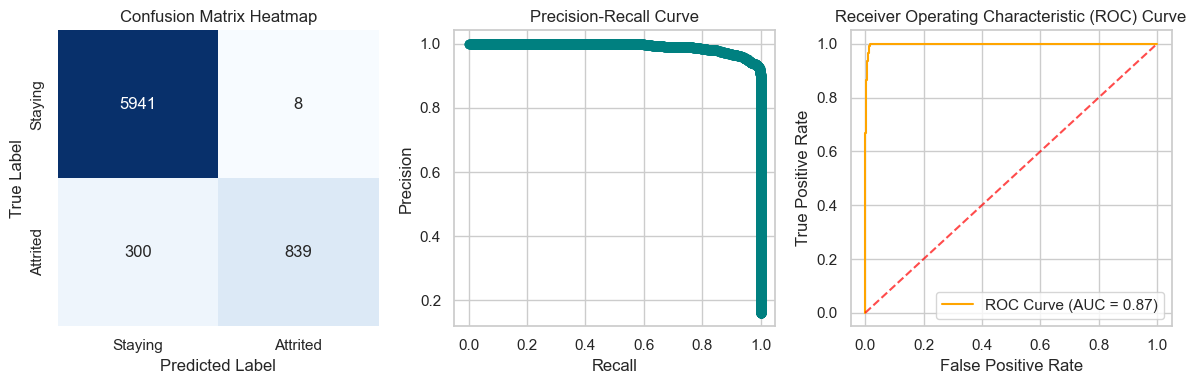

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2551
           1       0.90      0.54      0.68       488

    accuracy                           0.92      3039
   macro avg       0.91      0.77      0.81      3039
weighted avg       0.91      0.92      0.91      3039

[[2520   31]
 [ 223  265]]


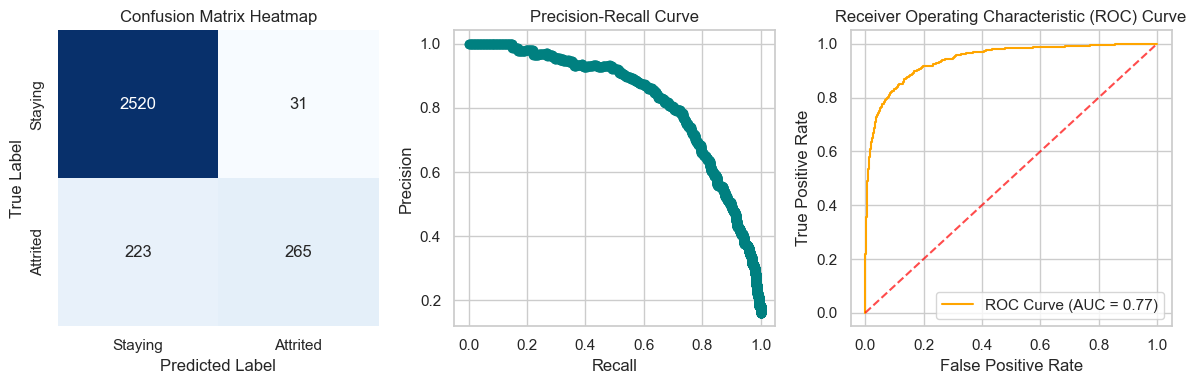

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,VotingModel,"[0.92, 0.9]","[0.99, 0.54]","[0.95, 0.68]","[0.95, 0.99]","[1.0, 0.74]","[0.97, 0.84]"


In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier()

voting_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='soft')
voting_model.fit(X_train, y_train)
#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = voting_model.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('VotingModel',y_train,y_trainpred_lg,False)
print(confusion_matrix(y_train,y_trainpred_lg))
#Plot Reports
Plot_Reports(voting_model,X_train,y_train,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = voting_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('VotingModel',y_test,y_testpred_lg,True)
print(confusion_matrix(y_test,y_testpred_lg))
#Plot Reports
Plot_Reports(voting_model,X_test,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

#### Recursive Feature Elimination (RFE)
PCA is lowering your performance, try to use feature selection techniques like Recursive Feature Elimination (RFE) or Lasso Regression to identify the most important features.

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      5949
           1       0.75      0.34      0.47      1139

    accuracy                           0.88      7088
   macro avg       0.82      0.66      0.70      7088
weighted avg       0.86      0.88      0.85      7088

[[5821  128]
 [ 755  384]]


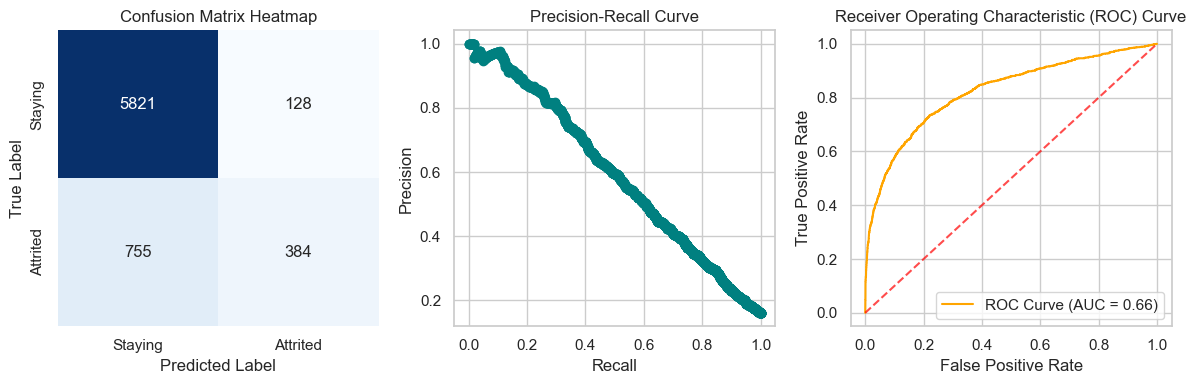

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2551
           1       0.75      0.31      0.44       488

    accuracy                           0.87      3039
   macro avg       0.82      0.64      0.68      3039
weighted avg       0.86      0.87      0.85      3039

[[2501   50]
 [ 338  150]]


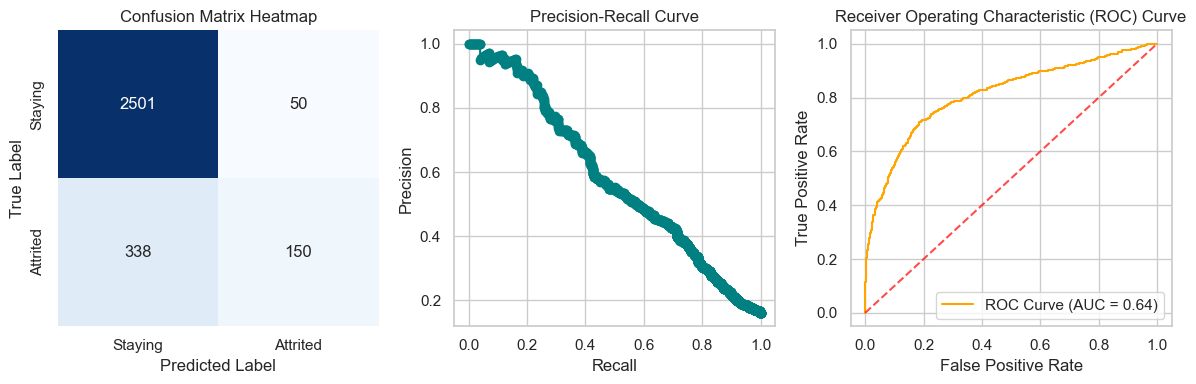

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,VotingModel,"[0.92, 0.9]","[0.99, 0.54]","[0.95, 0.68]","[0.95, 0.99]","[1.0, 0.74]","[0.97, 0.84]"
1,LogisticRegressionRFE,"[0.88, 0.75]","[0.98, 0.31]","[0.93, 0.44]","[0.89, 0.75]","[0.98, 0.34]","[0.93, 0.47]"


In [27]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = rfe.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionRFE',y_train,y_trainpred_lg,False)
print(confusion_matrix(y_train,y_trainpred_lg))
#Plot Reports
Plot_Reports(rfe,X_train,y_train,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = rfe.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionRFE',y_test,y_testpred_lg,True)
print(confusion_matrix(y_test,y_testpred_lg))
#Plot Reports
Plot_Reports(rfe,X_test,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

#### Lasso Regression
Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear model that can be used for both regression and feature selection. Lasso applies L1 regularization, which forces some of the feature coefficients to be exactly zero. This helps in identifying which features are most important for making predictions, as the coefficients for less important features are reduced to zero.

Lasso’s L1 regularization causes it to select a subset of the features by driving the coefficients of less important features exactly to zero. This leads to a sparse model where only a few features have non-zero weights.

By fitting a Lasso model, you not only get a regression model but also a way to identify the features that are the most important for making predictions.

Best alpha: 0.00017312372151995982
Customer_Age, Coefficient: -0.0
Credit_Limit, Coefficient: -0.060385733647789264
Total_Revolving_Bal, Coefficient: -0.22010536192246682
Total_Trans_Amt, Coefficient: -0.5262917965300374
Avg_Utilization_Ratio, Coefficient: -0.08941935181888079
Gender_Encoded, Coefficient: 0.056710582796219836
Dependent_count, Coefficient: 0.046580382591639886
Education_Level_sorted, Coefficient: 0.02551952962683086
Income_Category_sorted, Coefficient: 0.03569982281542252
Card_Category_sorted, Coefficient: 0.09709607805243947
Months_on_book, Coefficient: -0.0
Total_Relationship_Count, Coefficient: -0.26311238783585356
Months_Inactive_12_mon, Coefficient: 0.2938906052150593
Contacts_Count_12_mon, Coefficient: 0.31489863373373284
Marital_Status_sorted_Married, Coefficient: -0.0188461368610776
Marital_Status_sorted_Single, Coefficient: -0.0
Important Features: Index(['Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Avg_Utilization_Ratio', 'Gender_Encoded',

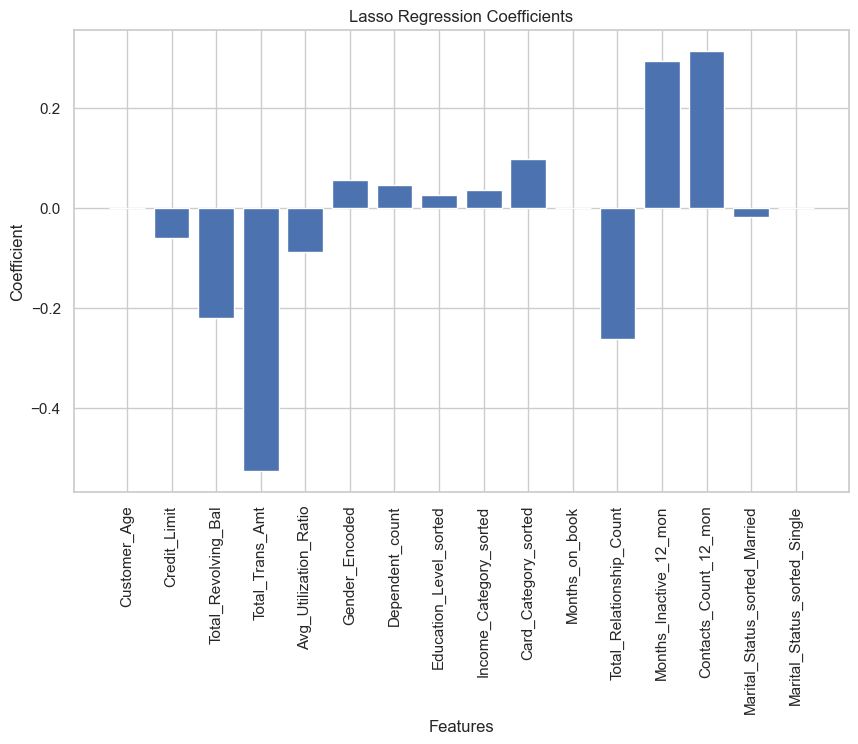

In [29]:
from sklearn.linear_model import Lasso, LassoCV
lasso_cv = LassoCV(cv=5)  # Alpha is the regularization parameter, adjust as needed
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)

X_trainCSV = pd.read_csv("../data/4.X_train.csv")

# Get the coefficients
coefficients = lasso_cv.coef_

# Get the features names (assuming X is a pandas DataFrame)
feature_names = X_trainCSV.columns

# Print coefficients and their corresponding features
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}, Coefficient: {coef}")

# Identify important features (non-zero coefficients)
important_features = np.where(coefficients != 0)[0]
print("Important Features:", feature_names[important_features])

# Plot the coefficients to visualize the importance
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_cv.coef_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.show()